In [2]:
import pandas as pd # Dataframe
from pandas import Series, DataFrame
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import matplotlib as mpl # Plotting
import matplotlib.cm as cm # Colormap
import matplotlib.pyplot as plt 
import seaborn as sns # More plotting styles
%matplotlib inline 

import numpy as np # Numerical library
import scipy as sp # Statistics library
import sklearn # Machine learning library
from sklearn.cross_validation import train_test_split, KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor 
import xgboost as xgb

import re # Regular expression
from scipy.io import loadmat # Read matlab file
from sklearn import metrics, preprocessing # for ROC curve and one-hot encoding
#import statsmodels.api as sm 
#from statsmodels.formula.api import ols # Ordinary least squares

# Earning and Debt of College Students in U.S.
## Data Cleaning and Processing

In [96]:
# input data
#df = pd.read_csv("2011.csv")
df = pd.read_csv("2013.csv")
print df.shape

(7804, 1825)


In [6]:
# data feature dictionary
df_dict = pd.read_excel('CollegeScorecardDataDictionary.xlsx','data_dictionary')

In [7]:
df.head(3)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,...,GRADS,ACCREDCODE,OMACHT6_FTFT,OMAWDP6_FTFT,OMACHT8_FTFT,OMAWDP8_FTFT,OMENRYP8_FTFT,OMENRAP8_FTFT,OMENRUP8_FTFT,OMACHT6_PTFT,OMAWDP6_PTFT,OMACHT8_PTFT,OMAWDP8_PTFT,OMENRYP8_PTFT,OMENRAP8_PTFT,OMENRUP8_PTFT,OMACHT6_FTNFT,OMAWDP6_FTNFT,OMACHT8_FTNFT,OMAWDP8_FTNFT,OMENRYP8_FTNFT,OMENRAP8_FTNFT,OMENRUP8_FTNFT,OMACHT6_PTNFT,OMAWDP6_PTNFT,OMACHT8_PTNFT,OMAWDP8_PTNFT,OMENRYP8_PTNFT,OMENRAP8_PTNFT,OMENRUP8_PTNFT,RET_FT4_POOLED,RET_FTL4_POOLED,RET_PT4_POOLED,RET_PTL4_POOLED,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,TRANS_4_POOLED,TRANS_L4_POOLED,DTRANS_4_POOLED,DTRANS_L4_POOLED,TRANS_4_POOLED_SUPP,TRANS_L4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,3.0,NaN,1,1,3,4,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5256,0.5256,377.0,470.0,370.0,470.0,370.0,470.0,424.0,420.0,420.0,15.0,19.0,14.0,...,1123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,3.0,NaN,1,1,3,4,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8569,0.8569,500.0,640.0,490.0,640.0,NaN,NaN,570.0,565.0,NaN,21.0,27.0,21.0,...,7019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,3.0,NaN,1,1,3,4,2,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Target features of interest
feature_earn = 'MN_EARN_WNE_P10'
feature_debt = 'DEBT_MDN_SUPP'

In [98]:
# remove rows without target values
print df.shape

### college with debt or earning privacy-suppressed
row_privacy=[]
for index, row in df.iterrows():
    if (row[feature_earn]=='PrivacySuppressed') or (row[feature_debt]=='PrivacySuppressed'):
        #print row['MN_EARN_WNE_P6'], row['DEBT_MDN_SUPP']
        row_privacy.append(index)
df=df.drop(row_privacy)
print df.shape        

### college with null debt or earning
row_null=[]
df[feature_earn]=df[feature_earn].astype(float)
df[feature_debt]=df[feature_debt].astype(float)
for index, row in df.iterrows():
    if (np.isnan(row[feature_earn])) or (np.isnan(row[feature_debt])):
        #print row['MN_EARN_WNE_P6'], row['DEBT_MDN_SUPP']
        row_null.append(index)
df=df.drop(row_null)
print df.shape  

(7804, 1825)
(6106, 1825)
(5675, 1825)


In [99]:
# store target responses: mean earning after 6 years and median debt
target = df[[feature_earn,feature_debt]]

In [100]:
# remove features
print df.shape

### features directly related to debt and earning
df_dict['VARIABLE NAME']=df_dict['VARIABLE NAME'].astype(str)
feature_aid_earn_repay = []
for index, row in df_dict.iterrows():
    if (row['dev-category']=='aid') or (row['dev-category']=='earnings') or (row['dev-category']=='repayment'):
        feature_aid_earn_repay.append(row['VARIABLE NAME'])
df=df.drop(feature_aid_earn_repay, axis=1)
print df.shape

### unimportant features
df=df.drop(['UNITID','OPEID','OPEID6','INSTNM','CITY','ALIAS', 'STABBR','ZIP','ACCREDAGENCY','INSTURL','NPCURL','SEPAR_DT_MDN','ACCREDCODE','T4APPROVALDATE','ST_FIPS','REGION','LOCALE','LOCALE2','LATITUDE','LONGITUDE'], axis=1)
df=df.drop(['CCBASIC','CCUGPROF','CCSIZSET','RELAFFIL'], axis=1)
df=df.drop(['MD_FAMINC'], axis=1)
print df.shape

### features with too much null. tunable selection.
df_null_feature = pd.DataFrame(df.isnull().sum()).reset_index()
feature_null = []
for index, row in df_null_feature.iterrows():
    if (row[0] > 0.1*df.shape[0]):
        feature_null.append(row['index'])
df=df.drop(feature_null, axis=1)
print df.shape    

### features with too much privacy-suppressed data. tunable selction.
feature_privacy = []
for col in df:
    if (df[col].dtype == 'object') and ((df[col]=='PrivacySuppressed').sum() > 0.1*df.shape[0]):
        feature_privacy.append(df[col].name) 
        #print df[col].name, (df[col]=='PrivacySuppressed').sum()
df=df.drop(feature_privacy, axis=1)
print df.shape    



(5675, 1825)
(5675, 1580)
(5675, 1555)
(5675, 1277)
(5675, 340)


In [101]:
%%time
# replace privacy-suppressed value by mean-imputation
df=df.reset_index(drop=True)

for col in df:
    tmp_list=[]
    for index, row in enumerate(df[col]): ### calculate mean for each feature without privacy-suppression
        if (row!='PrivacySuppressed'):
            tmp_list.append((float)(row))
    tmp_mean = np.mean(tmp_list)

    for index, row in enumerate(df[col]): ### replace privacy suppression by the feature mean
        if (row=='PrivacySuppressed'):
            df.loc[index,col]=tmp_mean
    df[col]=df[col].astype(float)
print df.shape 

(5675, 340)
Wall time: 19.9 s


## Exploratory Data Analysis

37831.4537445 10716.959207


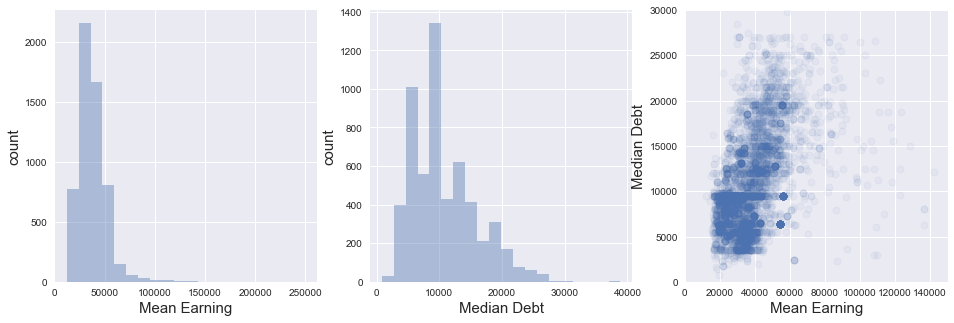

In [173]:
plt.figure(figsize=(16,5));

plt.subplot(131)
with sns.axes_style("white"):
    target[feature_earn].hist(bins=20, alpha=0.4);
    plt.xlabel("Mean Earning", fontsize=15)
    plt.ylabel("count", fontsize=15)
    #plt.title("Mean Earnings", fontsize=15);
plt.subplot(132)
with sns.axes_style("white"):
    target[feature_debt].hist(bins=20, alpha=0.4);
    plt.xlabel("Median Debt", fontsize=15)
    plt.ylabel("count", fontsize=15)
    #plt.title("Mean Earnings", fontsize=15);
plt.subplot(133)
with sns.axes_style("white"):
    plt.scatter(target[feature_earn], target[feature_debt], lw=1, alpha=0.05);
    plt.xlabel("Mean Earning", fontsize=15)
    plt.ylabel("Median Debt", fontsize=15)
    plt.xlim([0,150000])
    plt.ylim([0,30000])

print target[feature_earn].mean(), target[feature_debt].mean()

In [350]:
# earn-debt correlation
target.corr()

,MN_EARN_WNE_P10,DEBT_MDN_SUPP
MN_EARN_WNE_P10,1.000000,0.422028
DEBT_MDN_SUPP,0.422028,1.000000


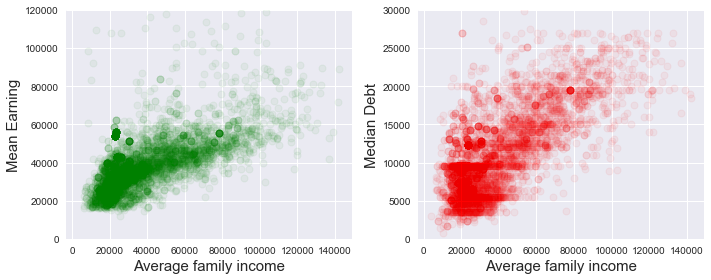

In [347]:
plt.figure(figsize=(10,4));
plot_feature='FAMINC'
    
plt.subplot(121)
with sns.axes_style("white"):
    plt.scatter(df[plot_feature], target[feature_earn], lw=1, alpha=0.05, color = 'green');
    plt.xlabel("Average family income", fontsize=15)
    plt.ylabel("Mean Earning", fontsize=15)
    plt.ylim([0,120000])
plt.subplot(122)
with sns.axes_style("white"):
    plt.scatter(df[plot_feature], target[feature_debt], lw=1, alpha=0.05, color = 'red');
    plt.xlabel("Average family income", fontsize=15)
    plt.ylabel("Median Debt", fontsize=15)
    plt.ylim([0,30000])
    plt.tight_layout()

#plt.savefig('figure1.jpg', dpi = 300)
    

## Modeling

In [105]:
df_backup = df

In [106]:
df = df_backup

In [107]:
# fill missing data
df=df.fillna(df.mean())
#df=df.fillna(0)


In [108]:
# Prepare numpy arrays of feature(x) and target(y) data set
y_earn_train = target[feature_earn]
y_debt_train = target[feature_debt]
features = []
x_train = df.values

print y_earn_train.shape, y_debt_train.shape, x_train.shape

(5675L,) (5675L,) (5675L, 340L)


In [109]:
# Define a function to do parameter grid search. Use RMSE as score function
def cv_gridsearch(clf, params, x, y, n_jobs=1, n_folds=5): ### n _jobs for parallelization
    gs = GridSearchCV(clf, param_grid=params, n_jobs=n_jobs, cv=n_folds, scoring='neg_mean_squared_error')
#    my_scorer = make_scorer(my_score_func, greater_is_better=True) ### self-defined score function
#    gs = GridSearchCV(clf, param_grid=params, n_jobs=n_jobs, cv=n_folds, scoring=my_scorer)
    gs.fit(x, y)
    print gs.best_params_
    print "Best CV RMSE score:", np.sqrt(-gs.best_score_)
#    print "All CV results:", gs.grid_scores_
#    print "Training score:", metrics.roc_auc_score(y, preds)
    return gs.best_params_, gs.best_estimator_

def my_score_func(y,pred): ### WARNING: using my_score_func will freeze when n_jobs!=1.
#    return metrics.mean_squared_error(y,pred)
    return metrics.explained_variance_score(y,pred)


In [110]:
%%time
### Random Forest
params = {'n_estimators':[50], 'max_depth':[15], 'min_samples_leaf':[5], 'max_features':[0.3], 'random_state':[0], 'verbose':[0]}
rf_params, best_model_earn = cv_gridsearch(RandomForestRegressor(), params, x_train, y_earn_train, 3, 10)
rf_params, best_model_debt = cv_gridsearch(RandomForestRegressor(), params, x_train, y_debt_train, 3, 10)

{'verbose': 0, 'min_samples_leaf': 5, 'n_estimators': 50, 'random_state': 0, 'max_features': 0.3, 'max_depth': 15}
Best CV RMSE score: 7287.32750293
{'verbose': 0, 'min_samples_leaf': 5, 'n_estimators': 50, 'random_state': 0, 'max_features': 0.3, 'max_depth': 15}
Best CV RMSE score: 2335.31486789
Wall time: 1min 17s


In [205]:
df_feature_importance = pd.DataFrame({"Feature": df.columns.values})
df_feature_importance["Earning"] = best_model_earn.feature_importances_
df_feature_importance["Debt"] = best_model_debt.feature_importances_

print df_feature_importance.loc[df_feature_importance['Feature']=='SAT_AVG']
df_feature_importance.sort_values(by=['Earning'],ascending=False)
#df_feature_importance.sort_values(by=['Debt'],ascending=False)

Empty DataFrame
Columns: [Feature, Earning, Debt]
Index: []


,Feature,Earning,Debt
0,SCH_DEG,0.099497,1.365975e-02
247,INEXPFTE,0.088469,2.563808e-03
3,PREDDEG,0.069948,2.534860e-02
334,ICLEVEL,0.067285,2.395712e-02
326,PELL_EVER,0.065109,5.513545e-02
332,FAMINC,0.040020,1.999327e-01
261,COMP_ORIG_YR6_RT,0.037313,1.241463e-02
272,IND_INC_AVG,0.033141,3.837220e-03
271,DEP_INC_AVG,0.030006,6.753710e-02
333,FAMINC_IND,0.025248,6.210013e-03


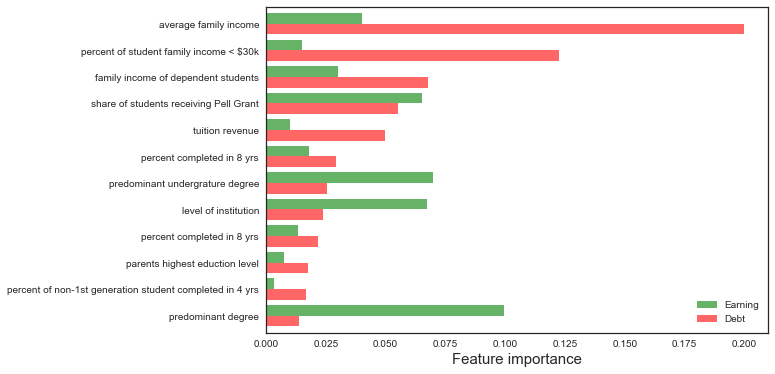

In [343]:
# plot feature importance
df_plot_feature_import = df_feature_importance.sort_values(by=['Debt'],ascending=False)[0:12];
df_plot_feature_import['Feature_meaning']=['average family income',
                                           'percent of student family income < $30k',
                                          'family income of dependent students',
                                          'share of students receiving Pell Grant',
                                          'tuition revenue',
                                          'percent completed in 8 yrs',
                                          'predominant undergrature degree',
                                          'level of institution',
                                          'percent completed in 8 yrs',
                                          'parents highest eduction level',
                                           'percent of non-1st generation student completed in 4 yrs',
                                          'predominant degree']

with sns.axes_style("white"):
    df_plot_feature_import.set_index('Feature_meaning').plot(kind='barh', figsize=(9,6), width=0.8, alpha=0.6, color=('green','red')).invert_yaxis();
    plt.xlabel("Feature importance", fontsize=15);
    plt.ylabel(''); 

plt.savefig('figure2.jpg', dpi = 300, bbox_inches='tight')
